In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
from pathlib import Path
import ast

models = {'model_02':2, 'model_01':3, 'model_03':4, 'model_05':5, 'model_06':6}

def get_data(version):
    test_accuracies = {}
    overfitting = {}
    for model in models:
        no_conv_layers = models[model]
        
        path = Path('..', 'outputs', version, model, 'details.txt')
        
        my_dict = {}
        with open(path) as f:
            lines = f.readlines()

        for line in lines:
            title, data = line.split(':')
            data = data.replace('\n', '')

            my_dict[title] = ast.literal_eval(data)
            
        my_dict['overfitting'] = list(np.subtract(np.array(my_dict['train_accuracy']), np.array(my_dict['test_accuracy'])))
        
        test_accuracies[no_conv_layers] = my_dict['test_accuracy'][-1]
        overfitting[no_conv_layers] = my_dict['overfitting'][-1]
        
    return test_accuracies, overfitting


bw_test_accuracies, bw_overfitting = get_data('BW_batchsize_32')
test_accuracies, overfitting = get_data('batchsize_32')


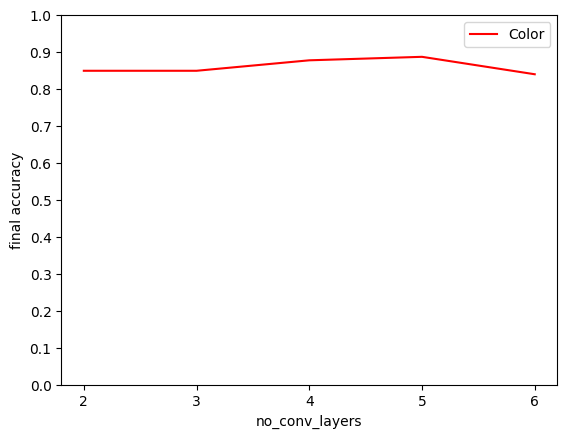

In [82]:
def plot_dicts(color_dict, y_axis):
    plt.plot(color_dict.keys(), color_dict.values(), label="Color", color='red')
    plt.xlabel('no_conv_layers')
    plt.ylabel(y_axis)
    plt.yticks([x / 100 for x in range(100, -1, -10)])
    plt.xticks(range(2, 7))
    plt.legend()
    
plot_dicts(test_accuracies,'final accuracy')

In [86]:
def plot_dicts(bw_dict, color_dict, y_axis):
    plt.plot(bw_dict.keys(), bw_dict.values(), label="Greyscale", color='darkgreen')
    plt.plot(color_dict.keys(), color_dict.values(), label="Color", color='red')
    plt.xlabel('no_conv_layers')
    plt.ylabel(y_axis)
    plt.yticks([x / 100 for x in range(100, -1, -10)])
    plt.xticks(range(2, 7))
    plt.legend()

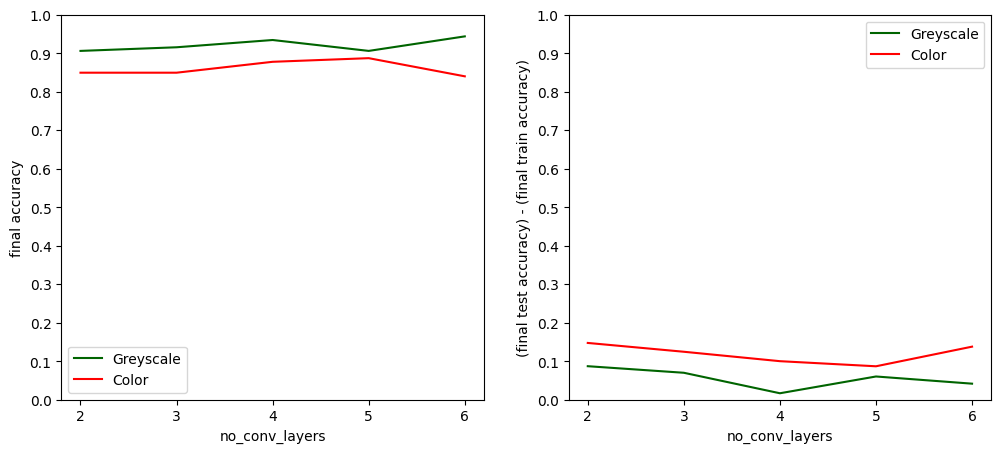

In [78]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_dicts(bw_test_accuracies, test_accuracies,'final accuracy')

plt.subplot(1, 2, 2)
plot_dicts(bw_overfitting, overfitting, '(final test accuracy) - (final train accuracy)')